<a href="https://colab.research.google.com/github/JairoRotava/Colab_studies/blob/master/megasena_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial Colab, Keras e Mega-sena
## Previsão de resultados mega-sena
Este é um tutorial prático para uso da plataforma Colab e Keras para estudos de redes neurais. O Colab e Keras permitem os iniciantes testarem e aprenderem diferentes técnicas de machine learning com mais facilidade, já que o Colab oferece um ambiente pronto e um hardware bom, e o Keras simplifica o desenvolvimento de redes neurais, evitando detalhes técnicos que dificultam o entendimento do assunto. Voce precisa somente de um navegador de internet e uma conexão vagabunda. Não precisa instalr linux, nem ficar decifrando as várias versões e pacotes que precisam ser instalados para trabalhar com python e keras.

O **Colab** é uma máquina virtual disponibilizada pelo Google. É um hardware relativamente poderoso, com bom processador, memória RAM e GPU. Dificilmente voce terá uma hardware melhor sem gastar muito dinheiro. O único detalhe é que a máquina dura no máximo 12h, depois disso qualquer coisa que foi salva ou feita é descartada.

O **Keras** é um framework para redes neurais. Foi o framework mais fácil de utilizar que encontrei, e é ótimo para aprender, pois detalhes de implementação ficam escondidos e não atrapalham no entendimento da rede neural.

O tutorial utiliza como base de dados os resultados da mega-sena e tenta fazer a previsão do próximo resultado. Os dados são obtidos diretamente na internet, descompactados, processados e utilizados como entrada em diferente tipo de redes.

Para executar os comandos de forma sequencial pressione **shift+enter**.

In [1]:
# Vamos dar uma checada no CPU da máquina virtual
!lscpu |grep 'Model name'

Model name:          Intel(R) Xeon(R) CPU @ 2.00GHz


In [2]:
# Memoria RAM
!cat /proc/meminfo | grep 'MemAvailable'

MemAvailable:   12484244 kB


In [3]:
# Armazenamento
!df -h / | awk '{print $4}'

Avail
310G


In [4]:
# Verifica GPU
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-071a5935-e8a1-f6da-084e-4a08061c49ed)


# Obtendo resultados da Mega-sena
Os dados são obtidos diretamente do site da caixa. No Colab temos disponível uma máquina virtual, e qualquer comando precedido do sinal de exclamação é executado no bash da maquina. Estamos falando de linux...claro...

In [5]:
# Download dos resultados
!wget 'http://www1.caixa.gov.br/loterias/_arquivos/loterias/D_megase.zip'

--2019-09-24 12:20:59--  http://www1.caixa.gov.br/loterias/_arquivos/loterias/D_megase.zip
Resolving www1.caixa.gov.br (www1.caixa.gov.br)... 200.201.172.210
Connecting to www1.caixa.gov.br (www1.caixa.gov.br)|200.201.172.210|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://www1.caixa.gov.br/loterias/_arquivos/loterias/D_megase.zip [following]
--2019-09-24 12:21:00--  http://www1.caixa.gov.br/loterias/_arquivos/loterias/D_megase.zip
Connecting to www1.caixa.gov.br (www1.caixa.gov.br)|200.201.172.210|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-zip-compressed]
Saving to: ‘D_megase.zip’

D_megase.zip            [            <=>     ] 127.53K  50.2KB/s    in 2.5s    

2019-09-24 12:21:03 (50.2 KB/s) - ‘D_megase.zip’ saved [130587]



In [6]:
# Descompacta arquivo
!unzip -o 'D_megase.zip'

Archive:  D_megase.zip
  inflating: d_mega.htm              
 extracting: t2.gif                  


In [7]:
# Mostra os arquivo no diretório
!ls

d_mega.htm  D_megase.zip  sample_data  t2.gif


In [0]:
# Importa as bibliotecas numpy e pandas, que são muito utilizadas em python
import numpy               as np
import pandas              as pd

In [0]:
# Transforma o arquivo html em dataframe do pandas.
df_list = pd.read_html('d_mega.htm')
df = df_list[0]
# Remove os concursos duplicado. Os concursos com mais de um ganhador aparecem múltiplas vezes devido conversão do html para dataframe
df.drop_duplicates(subset ='Concurso',keep = 'first', inplace = True)
# Salva como arquivo csv
df.to_csv('resultados_megasena.csv')

# Avaliando os dados
Agora vamos avaliar oque temos de dados. O arquivo salvo na etapa anterior é carrego e algumas informações são retiradas dele. Não seria necessário carregar o aquivo novamente, já que os dados estão disponiveis da etapa anterior, mas fazendo isso é possível recarregar os dados facilmente em caso de necessidade, 
sem precisar executar as etapas anteriores que são mais demoradas.

In [10]:
# Le arquivo de dados
df = pd.read_csv("resultados_megasena.csv")

# Apresenta os últimos elementos do  (rabo) do  dataframe
df.tail()

,Unnamed: 0,Concurso,Data Sorteio,1ª Dezena,2ª Dezena,3ª Dezena,4ª Dezena,5ª Dezena,6ª Dezena,Arrecadacao_Total,Ganhadores_Sena,Cidade,UF,Rateio_Sena,Ganhadores_Quina,Rateio_Quina,Ganhadores_Quadra,Rateio_Quadra,Acumulado,Valor_Acumulado,Estimativa_Prêmio,Acumulado_Mega_da_Virada
2185,2453,2186,09/09/2019,27,19,12,41,18,46,90.063.86900,0,&nbsp,&nbsp,000,131,39.63811,11409,65018.0,SIM,82.828.32578,90.000.00000,69.230.18845
2186,2454,2187,11/09/2019,16,21,50,10,46,11,87.325.04200,0,&nbsp,&nbsp,000,124,40.60231,10072,71409.0,SIM,92.102.74661,100.000.00000,70.555.10572
2187,2455,2188,14/09/2019,60,51,21,28,2,17,126.808.83950,0,&nbsp,&nbsp,000,154,47.47472,13387,78019.0,SIM,105.570.57343,120.000.00000,72.479.08100
2188,2456,2189,18/09/2019,33,29,11,4,16,22,136.664.65050,1,BRASÍLIA,DF,120.085.14397,406,19.40724,24366,46196.0,NÃO,000,38.000.00000,74.552.59109
2189,2457,2190,21/09/2019,53,35,25,9,5,20,47.442.47550,0,&nbsp,&nbsp,000,94,29.09866,6835,57169.0,SIM,39.320.93903,44.000.00000,75.272.40015


In [11]:
# Obtem algumas informações básicas dos dados

# Gera lista com todas dezenas
dezenas = pd.DataFrame(df['1ª Dezena'].tolist() + df['2ª Dezena'].tolist() + df['3ª Dezena'].tolist() + df['4ª Dezena'].tolist() + df['5ª Dezena'].tolist() + df['6ª Dezena'].tolist(), columns=['numeros'])

# Mostra frequencia das dezenas
print('Frequencia das Dezenas')
frequencia_dezenas = dezenas['numeros'].value_counts().sort_values(ascending=False)
print(frequencia_dezenas)

Frequencia das Dezenas
10    250
53    247
5     244
54    239
23    239
4     238
33    237
51    236
24    236
42    234
37    231
17    230
44    229
34    229
28    229
27    229
43    228
16    227
13    227
30    227
52    226
36    226
2     226
56    225
6     225
50    224
32    223
35    223
18    222
29    222
41    222
8     221
11    220
12    219
38    219
59    218
49    217
1     217
46    216
58    214
45    213
47    212
19    211
40    210
20    209
31    208
39    206
7     205
14    204
25    204
60    202
48    201
3     200
57    198
9     197
15    197
22    194
21    193
55    186
26    179
Name: numeros, dtype: int64


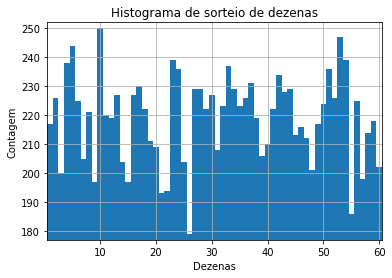

In [12]:
# Importa biblioteca matplotlib para plotar os gráficos
import matplotlib.pyplot   as plt
%matplotlib inline
pd.set_option('display.max_columns',500)

# Histograma
n, bins, patches = plt.hist(dezenas.to_numpy(), bins= np.arange(1 - 0.5, 60 + 0.5 + 1, 1))
plt.xlabel('Dezenas')
plt.ylabel('Contagem')
plt.title('Histograma de sorteio de dezenas')
plt.xlim(0.5, 60.5)
plt.ylim(min(n)-2, max(n)+2)
plt.grid(True)
plt.show()

# Carrega Keras

Carrega alguns compoentes do Keras e mostra se a GPU foi reconhecida pelo tensorflow (o tensorflow é utilizado pelo Keras. O Keras pode utilizar diferentes framework para redes neurais, mas o default é o tensoflow)

In [13]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

# Mostra GPU instalada
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

Using TensorFlow backend.


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3442642775952568683, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 4175420571691210549
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 1479103627851368137
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14912199066
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 9808823951004185899
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

# Rede neural simples
Neste exemplo utilizamos uma rede simples. Voce pode tentar alterar o formato da rede, o numero de neuronios e o tipo de ativação. Como entrada são fornecidas as dezenas do sorteio atual e a rede deve prever as dezenas do próximo sorteio. 

In [38]:
# definição do modelo
N_DEZENAS = 6
N_NEURONIOS = 50
N_EPOCHS = 50

model = keras.Sequential()
model.add(keras.layers.Dense(N_NEURONIOS, input_shape=[N_DEZENAS], activation="relu"))
model.add(keras.layers.Dense(N_NEURONIOS))
model.add(keras.layers.Dense(6))

model.compile(loss="mse",optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 50)                350       
_________________________________________________________________
dense_16 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_17 (Dense)             (None, 6)                 306       
Total params: 3,206
Trainable params: 3,206
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Prepara dados e entrada e de validação

# Sequencia de resultados
resultados = pd.DataFrame(df[['1ª Dezena','2ª Dezena','3ª Dezena',
                              '4ª Dezena','5ª Dezena','6ª Dezena',]]).to_numpy()
N_RESULT = len(resultados)

# X é são as 6 dezena de entrada, Y é o resultado do próximo sorteio.
# Aqui todos os resultados menos o último vai em X, e todos os resultados menos o primeiro vai em Y
X_series,y_series = resultados[:-1],resultados[1:]
#separa 70% dos dados para treino e restante para validação
N_TREINO = int(0.7 * N_RESULT)
X_train, y_train = X_series[:N_TREINO], y_series[:N_TREINO]
X_valid, y_valid = X_series[:-N_TREINO], y_series[:-N_TREINO]

In [40]:
# Treina a rede
VALIDATION_SPLIT = 0.3
BATCH_SIZE = 32

# exemplo utilizando validacao de dados separados
#history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid),epochs=N_EPOCHS)

# exemplo separando dados de validacao dinamicamente a cada batch
history = model.fit(X_series, y_series, validation_split=VALIDATION_SPLIT,
                    batch_size=BATCH_SIZE,epochs=N_EPOCHS, shuffle=True, 
                    verbose=2)



Train on 1532 samples, validate on 657 samples
Epoch 1/50
1532/1532 - 0s - loss: 529.9754 - acc: 0.1802 - val_loss: 342.6591 - val_acc: 0.1446
Epoch 2/50
1532/1532 - 0s - loss: 344.9617 - acc: 0.1756 - val_loss: 327.7310 - val_acc: 0.1826
Epoch 3/50
1532/1532 - 0s - loss: 334.4386 - acc: 0.1808 - val_loss: 325.7158 - val_acc: 0.1689
Epoch 4/50
1532/1532 - 0s - loss: 331.6687 - acc: 0.1710 - val_loss: 322.4990 - val_acc: 0.1948
Epoch 5/50
1532/1532 - 0s - loss: 328.6831 - acc: 0.1736 - val_loss: 324.1518 - val_acc: 0.2055
Epoch 6/50
1532/1532 - 0s - loss: 327.2196 - acc: 0.1730 - val_loss: 321.4688 - val_acc: 0.1811
Epoch 7/50
1532/1532 - 0s - loss: 326.1037 - acc: 0.1749 - val_loss: 320.7687 - val_acc: 0.1735
Epoch 8/50
1532/1532 - 0s - loss: 324.4303 - acc: 0.1886 - val_loss: 319.1353 - val_acc: 0.1903
Epoch 9/50
1532/1532 - 0s - loss: 323.9937 - acc: 0.1821 - val_loss: 320.5154 - val_acc: 0.1781
Epoch 10/50
1532/1532 - 0s - loss: 324.0974 - acc: 0.1762 - val_loss: 319.0801 - val_acc:

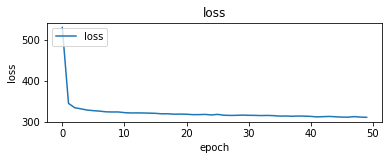

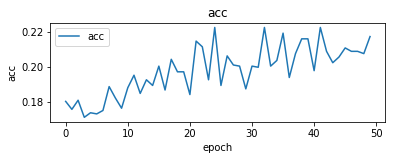

In [46]:
# Mostra evolução de loss
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

plt.subplot(2, 1, 2)
plt.plot(history.history['acc'])
plt.title('acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['acc'], loc='upper left')
plt.show()


In [47]:
ultimo_resultado = resultados[-1:]
ultimo_resultado

array([[53, 35, 25,  9,  5, 20]])

In [48]:
# Faz previsão da próxima dezena utilizando o ultimo resultado
previsao = model.predict(ultimo_resultado)
previsao

array([[28.037334, 24.655367, 25.862461, 28.0622  , 30.172274, 25.977528]],
      dtype=float32)

hummm...isso aqui não parece bom. Os numero são tudo quebrados, e não tem nenhum tipo de informação de tempo na rede. A entrada é somente as últimas dezenas, talvez a gente deva tentar fornecer uma sequencia de jogos para ver se o resultado melhora. Vamos tentar outro tipo de  rede.

# RNN Simples

O próximo passo é utilizar uma rede que tenha algum tipo de memória temporal. Para isso vamos utilizar uma rede simples RNN, que tem como entrada os últimos N_SORTEIOS e na saída apresenta a previsão do próximo sorteio.

In [49]:
# Note que aqui o modelo de declarado de outra forma, em forma de função
# Este é apenas outra forma de declarar o modelo.
model = tf.keras.Sequential([
    keras.layers.SimpleRNN(N_NEURONIOS, return_sequences=True, input_shape=[None, N_DEZENAS], activation="relu"),
#    keras.layers.GRU(20, return_sequences=True),
#    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.Dense(6)
])
model.compile(loss="mse",optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, None, 50)          2850      
_________________________________________________________________
dense_18 (Dense)             (None, None, 6)           306       
Total params: 3,156
Trainable params: 3,156
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Dados de entrada

N_SORTEIOS = 40

# X são as dezena dos ultimos N_SORTEIOS de entrada, Y são os N_SORTEIOS deslocados em uma posição para frente
i0 = np.arange(N_RESULT-N_SORTEIOS).reshape((N_RESULT-N_SORTEIOS,1))
Is = i0 + np.arange(0, N_SORTEIOS + 1)
ys = resultados[Is]

X_series,y_series = ys[:, :-1].reshape(-1, N_SORTEIOS, N_DEZENAS), ys[:, 1:].reshape(-1, N_SORTEIOS, N_DEZENAS)

#separa 70% dos dados para treino e restante para validação
N_TREINO = int(0.7 * N_RESULT)
X_train, y_train = X_series[:N_TREINO], y_series[:N_TREINO]
X_valid, y_valid = X_series[:-N_TREINO], y_series[:-N_TREINO]

In [51]:
history = model.fit(X_train, y_train, epochs=N_EPOCHS, 
                   validation_data=(X_valid, y_valid))

Train on 1533 samples, validate on 617 samples
Epoch 1/50
1533/1533 [==============================] - 1s 640us/sample - loss: 539.6002 - acc: 0.1720 - val_loss: 360.3855 - val_acc: 0.1816
Epoch 2/50
1533/1533 [==============================] - 1s 460us/sample - loss: 347.9402 - acc: 0.1785 - val_loss: 327.3825 - val_acc: 0.1818
Epoch 3/50
1533/1533 [==============================] - 1s 457us/sample - loss: 326.1158 - acc: 0.1888 - val_loss: 312.2606 - val_acc: 0.2115
Epoch 4/50
1533/1533 [==============================] - 1s 449us/sample - loss: 315.2255 - acc: 0.1967 - val_loss: 303.8876 - val_acc: 0.2143
Epoch 5/50
1533/1533 [==============================] - 1s 451us/sample - loss: 308.8974 - acc: 0.1954 - val_loss: 298.7947 - val_acc: 0.2119
Epoch 6/50
1533/1533 [==============================] - 1s 448us/sample - loss: 304.7427 - acc: 0.1981 - val_loss: 295.8351 - val_acc: 0.2160
Epoch 7/50
1533/1533 [==============================] - 1s 471us/sample - loss: 301.6185 - acc: 0.199

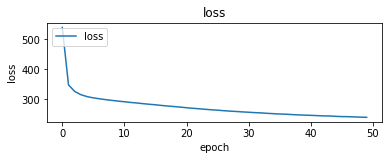

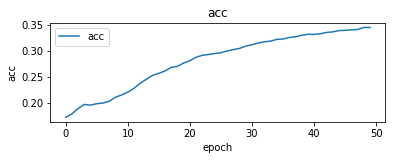

In [52]:
# Mostra evolução de loss
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

plt.subplot(2, 1, 2)
plt.plot(history.history['acc'])
plt.title('acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['acc'], loc='upper left')
plt.show()

In [53]:
ultimo_resultado = y_series[-1:]
ultimo_resultado

array([[[36, 38,  2, 29, 14, 18],
        [49, 36, 29, 26, 59, 50],
        [13, 28, 31,  8, 33, 32],
        [53, 41, 47, 50,  7, 25],
        [37, 44,  2, 27,  6, 47],
        [49, 39, 23,  6, 26,  1],
        [34, 48, 31, 39, 33, 35],
        [ 9, 27, 46, 59, 35, 45],
        [53, 35, 38, 14, 45, 26],
        [53, 49,  1, 46, 47, 19],
        [24, 10,  8, 44,  9, 42],
        [11, 30, 42, 34, 16, 22],
        [45, 20, 24, 36, 18,  8],
        [48, 17, 58, 47, 16, 25],
        [56, 49, 54, 43,  5, 37],
        [44,  3, 34, 56, 19, 58],
        [37, 45, 38, 43, 54, 27],
        [37, 25, 29,  4,  1, 27],
        [45,  7, 34, 59, 51, 54],
        [36, 21, 51, 10, 24, 38],
        [19, 12, 13, 36, 55, 44],
        [ 9, 57, 43, 37, 28, 24],
        [ 9, 48, 44, 42,  2, 50],
        [36, 10, 34, 15, 60, 56],
        [55, 53,  7, 32, 43, 25],
        [23,  8, 25, 43, 39, 44],
        [14,  9, 48, 11, 31, 51],
        [16, 21, 42,  2, 50, 56],
        [24,  2, 35, 54, 50, 13],
        [16, 1

In [54]:
# Faz previsão da próxima dezena utilizando o ultimo resultado
previsao = model.predict(ultimo_resultado)
previsao[0,-1,:]

array([28.008081, 35.22294 , 37.093975, 22.538761, 28.192427, 29.420715],
      dtype=float32)

A componente de tempo foi adicionada a essa rede, mas o números continuam saindo quebrados. Vamos tentar alterar a saída para classes, onde cada dezenas possível é uma classe diferente. Vamos ver oque acontece.

# Multi-label

Utiliza modelo multi-label para evitar o problema com numeros quebrados. Cada número possível de 1 a 60 é transformado em uma classe.
Para uma rede multi-label é utilizado o activador sigmoid e a perda binary_crossentropy.

In [55]:
model = tf.keras.Sequential([
    keras.layers.SimpleRNN(N_NEURONIOS, return_sequences=True, input_shape=[None, N_DEZENAS], activation="relu"),
#    keras.layers.GRU(20, return_sequences=True),
#    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.Dense(60,activation="sigmoid")
])
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
model.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, None, 50)          2850      
_________________________________________________________________
dense_19 (Dense)             (None, None, 60)          3060      
Total params: 5,910
Trainable params: 5,910
Non-trainable params: 0
_________________________________________________________________


## Transforma as dezenas em um array de classe


In [0]:
NUM_DEZENAS = 60
# 
input = [1, 2, 3, 4, 5, 60]

# codifica dezenas para one-hot encoded
def encode(C):
  x = np.zeros(NUM_DEZENAS,dtype=int)
  for val in C:
    x[val-1] = 1
  return(x)

def encode_matrix(M):
  O = np.empty([M.shape[0],M.shape[1],60],dtype=int)
  for i in range(M.shape[0]):
    for j in range(M.shape[1]):
      O[i,j] = encode(M[i,j])
  return(O)

In [57]:
y_train_encoded = encode_matrix(y_train)
y_valid_encoded = encode_matrix(y_valid)
# Exemplo de como as dezenas são alteradas para classe. 
#Caso nas dezenas tenha o número 1 o primeiro elemento do array será 1. Se houver a dezena 10, o décimo elemento será 1.
print(y_train[0,0])
print(y_train_encoded[0,0])

[ 9 39 37 49 43 41]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


In [71]:
N_EPOCHS = 200
history = model.fit(X_train, y_train_encoded, epochs=N_EPOCHS, 
                   validation_data=(X_valid, y_valid_encoded))

Train on 1533 samples, validate on 617 samples
Epoch 1/200
1533/1533 [==============================] - 1s 505us/sample - loss: 0.2866 - acc: 0.9044 - val_loss: 0.2899 - val_acc: 0.9039
Epoch 2/200
1533/1533 [==============================] - 1s 488us/sample - loss: 0.2866 - acc: 0.9044 - val_loss: 0.2903 - val_acc: 0.9038
Epoch 3/200
1533/1533 [==============================] - 1s 497us/sample - loss: 0.2865 - acc: 0.9043 - val_loss: 0.2899 - val_acc: 0.9040
Epoch 4/200
1533/1533 [==============================] - 1s 482us/sample - loss: 0.2863 - acc: 0.9044 - val_loss: 0.2902 - val_acc: 0.9039
Epoch 5/200
1533/1533 [==============================] - 1s 513us/sample - loss: 0.2865 - acc: 0.9044 - val_loss: 0.2901 - val_acc: 0.9038
Epoch 6/200
1533/1533 [==============================] - 1s 500us/sample - loss: 0.2864 - acc: 0.9044 - val_loss: 0.2900 - val_acc: 0.9038
Epoch 7/200
1533/1533 [==============================] - 1s 494us/sample - loss: 0.2863 - acc: 0.9044 - val_loss: 0.290

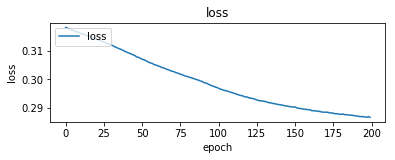

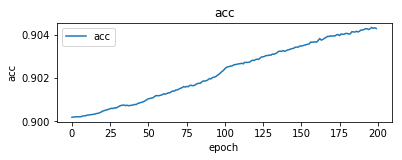

In [65]:
# Mostra evolução de loss
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

plt.subplot(2, 1, 2)
plt.plot(history.history['acc'])
plt.title('acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['acc'], loc='upper left')
plt.show()

In [72]:
# Faz previsão da próxima dezena utilizando o ultimo resultado
previsao = model.predict(ultimo_resultado)
dezenas_pred = previsao[0,-1,:]
dezenas_pred

array([0.09812406, 0.0359278 , 0.12724799, 0.12482271, 0.06840292,
       0.06001872, 0.04909492, 0.06650862, 0.14880982, 0.08587849,
       0.03706458, 0.07466528, 0.12920967, 0.06567422, 0.06773189,
       0.08582085, 0.04162252, 0.20880938, 0.18414706, 0.21570262,
       0.09122369, 0.01310274, 0.13449052, 0.03329998, 0.04514444,
       0.29458657, 0.03027245, 0.05707312, 0.22461161, 0.05109835,
       0.1598646 , 0.0591338 , 0.09113875, 0.11026064, 0.01077279,
       0.01480624, 0.17089972, 0.03575656, 0.13210285, 0.05358955,
       0.03442559, 0.07990605, 0.12646827, 0.09616819, 0.10661   ,
       0.13380736, 0.13310921, 0.07497767, 0.29838908, 0.0977293 ,
       0.22627845, 0.08267561, 0.0631125 , 0.17938259, 0.08098775,
       0.03168574, 0.13636753, 0.05734044, 0.06033194, 0.20356297],
      dtype=float32)

In [0]:
probabilidade_dezenas = pd.DataFrame({'Dezena': range(1,61),'Probabilidade' : dezenas_pred[:]*100}).sort_values(by=['Probabilidade'], ascending=False)

In [74]:
probabilidade_dezenas

,Dezena,Probabilidade
48,49,29.838907
25,26,29.458656
50,51,22.627846
28,29,22.461161
19,20,21.570263
17,18,20.880938
59,60,20.356297
18,19,18.414705
53,54,17.938259
36,37,17.089972


É observado pelo resultado que algumas dezenas tem uma probabilidade superior que as outras.

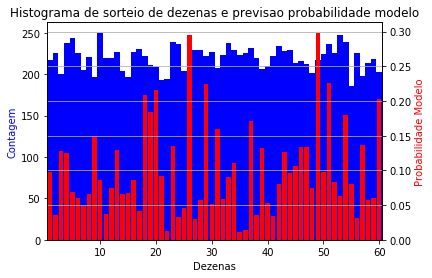

In [89]:
# Histograma
fig, ax1 = plt.subplots()

#plt.figure(figsize=(10, 6))
# Frequencia das dezenas nos resultados
n, bins, patches = plt.hist(dezenas.to_numpy(), 
                            bins= np.arange(1 - 0.5, 60 + 0.5 + 1, 1),color='b')
plt.ylabel('Contagem',color='b')
plt.xlabel('Dezenas')
# "Probabilidade" das dezenas gerado pela rede neural
# É criada uma nova escala, pois os valores são de magnitudes diferentes
ax2 = ax1.twinx()
plt.bar(range(1,61),dezenas_pred[:],color='r')
plt.ylabel('Probabilidade Modelo', color='r')
plt.title('Histograma de sorteio de dezenas e previsao probabilidade modelo')
plt.xlim(0.5, 60.5)
plt.grid(True)
plt.show()



Se voce pretende utilizar esses resultados para jogar na Mega, então escolha as os números com previsão de maior probabilidade. e boa sorte:

In [92]:
probabilidade_dezenas.head(10)

,Dezena,Probabilidade
48,49,29.838907
25,26,29.458656
50,51,22.627846
28,29,22.461161
19,20,21.570263
17,18,20.880938
59,60,20.356297
18,19,18.414705
53,54,17.938259
36,37,17.089972


# Conclusão
Esse tutorial mostrou operações básicas com o **Keras** e **Colab**. Provavelmente as redes não devem acertar nenhum previsão, pois supoe-se que os sorteios da Mega-sena são aletórios, e nenhuma rede deve ser capaz de modelor algo aleatório. Entretanto foi um bom exercício para entender melhor como as redes funcionam, e como uasr o **Colab** e **Keras**